# 1- Load and gain insight about dataset

In [83]:
# Download dataset with kaggle API
!kaggle datasets download -d arjunbhasin2013/ccdata --unzip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# check the shape 
df.shape

(8950, 18)

Immmm, we have `8950` row and `18` features

In [4]:
# show the columns
list(df.columns)


['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [5]:
# show some info about the ds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 1.1 Dealing with Null Values

In [6]:
# let`s check the null values
df.isna().sum().sort_values()

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

ok, we have some NULL values in `MINIMUM_PAYMENTS` feature, others columns Don\`t have !

In [7]:
# ok let`s deal with this NULL values
df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].describe()

,MINIMUM_PAYMENTS,CREDIT_LIMIT
count,8637.000000,8949.000000
mean,864.206542,4494.449450
std,2372.446607,3638.815725
min,0.019163,50.000000
25%,169.123707,1600.000000
50%,312.343947,3000.000000
75%,825.485459,6500.000000
max,76406.207520,30000.000000


In [8]:
# fillna for MINIMUM_PAYMENTS
mean_value_m = df['MINIMUM_PAYMENTS'].mean().round(2)
df['MINIMUM_PAYMENTS'].fillna(value=mean_value_m, inplace=True)

# fillna for CREDIT_LIMIT
mean_value_c = df['CREDIT_LIMIT'].mean().round(2)
df['CREDIT_LIMIT'].fillna(value=mean_value_c, inplace=True)

In [9]:
# check the null values again
df.isna().sum().sum()

0

## 1.2 Dealing with Outliers

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Detecting outliers using Boxplot

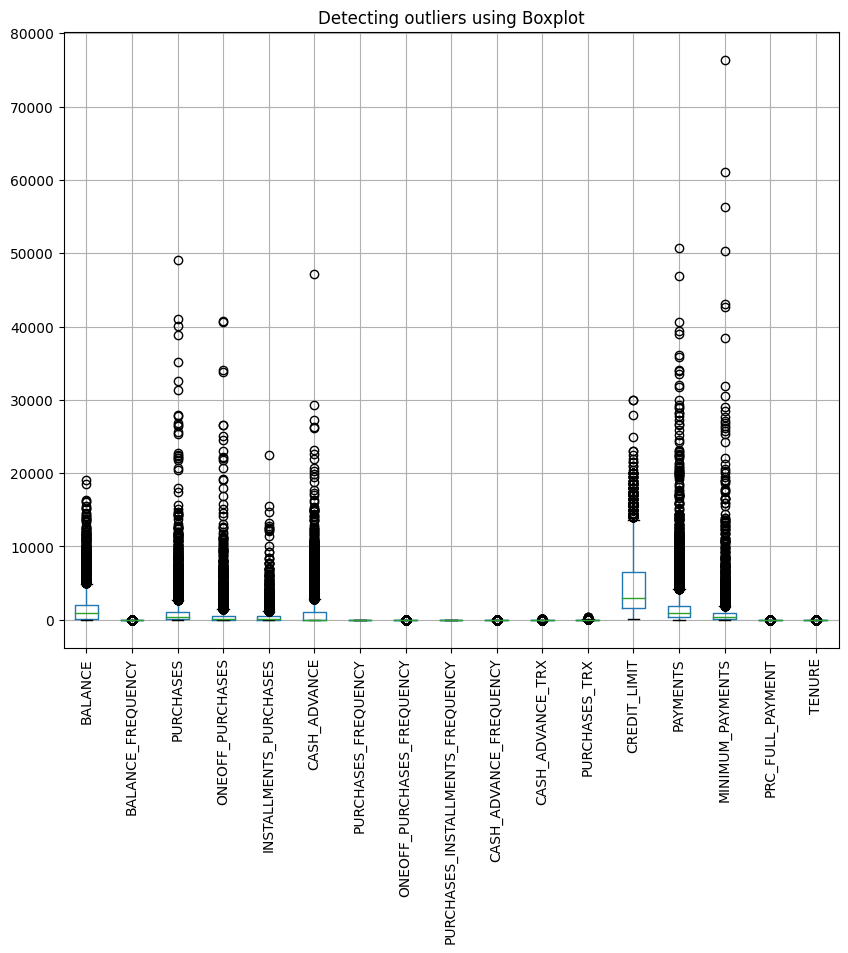

In [11]:
# Detecting outliers using Boxplot
df.boxplot(figsize=(10,8), rot=90.0)
plt.title("Detecting outliers using Boxplot")
plt.show()

###  Detecting outliers using the Inter Quantile Range(IQR)

In [12]:
# Detecting outliers using the Inter Quantile Range(IQR)
# Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.
def detect_outliers_iqr(data):
    sample_outliers = {}
    for col in list(data.columns)[1:]:
        sample = sorted(data[col])
        outliers = []
        q1 = np.percentile(sample, 25)
        q3 = np.percentile(sample, 75)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        
        for i in sample:
            if (i<lwr_bound or i>upr_bound):
                outliers.append(i)
        sample_outliers[col] = len(outliers)
    return sample_outliers # Driver code

In [13]:
print("Outliers from IQR method: ")
sample_outliers = detect_outliers_iqr(df)
outliers = pd.Series(sample_outliers)
outliers.sort_values()

Outliers from IQR method: 


PURCHASES_INSTALLMENTS_FREQUENCY       0
PURCHASES_FREQUENCY                    0
CREDIT_LIMIT                         248
CASH_ADVANCE_FREQUENCY               525
BALANCE                              695
PURCHASES_TRX                        766
MINIMUM_PAYMENTS                     774
ONEOFF_PURCHASES_FREQUENCY           782
CASH_ADVANCE_TRX                     804
PURCHASES                            808
PAYMENTS                             808
INSTALLMENTS_PURCHASES               867
ONEOFF_PURCHASES                    1013
CASH_ADVANCE                        1030
TENURE                              1366
PRC_FULL_PAYMENT                    1474
BALANCE_FREQUENCY                   1493
dtype: int64

## Handling Outliers

In [14]:
# Computing 10th, 90th percentiles and replacing the outliers
import math
def Handling_Outliers(df):
    data = df.copy()
    for col in list(data.columns)[1:]:
        sample = sorted(data[col])
        q1 = np.percentile(sample, 25)
        q3 = np.percentile(sample, 75)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        tenth_percentile = np.percentile(sample, 10)
        ninetieth_percentile = np.percentile(sample, 90)
        print(f'{col}:')
        print(f'10th = {tenth_percentile}, 90th = {ninetieth_percentile}')
        print(f'lwr_bound = {lwr_bound}, upr_bound = {upr_bound}')
        print("")
        b = np.where(sample < lwr_bound, lwr_bound, sample)
        sample_handling = np.where(b > upr_bound, upr_bound, b)
        data[col] = sample_handling
    return data

BALANCE:
10th = 23.575528800000008, 90th = 4338.563656599999
lwr_bound = -2760.5052645, upr_bound = 4942.9272155

BALANCE_FREQUENCY:
10th = 0.454545, 90th = 1.0
lwr_bound = 0.7222225000000001, upr_bound = 1.1666664999999998

PURCHASES:
10th = 0.0, 90th = 2542.6240000000003
lwr_bound = -1566.1075000000003, upr_bound = 2715.8725000000004

ONEOFF_PURCHASES:
10th = 0.0, 90th = 1600.0990000000004
lwr_bound = -866.1075, upr_bound = 1443.5124999999998

INSTALLMENTS_PURCHASES:
10th = 0.0, 90th = 1140.0700000000002
lwr_bound = -702.95625, upr_bound = 1171.59375

CASH_ADVANCE:
10th = 0.0, 90th = 3065.5345600000037
lwr_bound = -1670.7317088750003, upr_bound = 2784.5528481250003

PURCHASES_FREQUENCY:
10th = 0.0, 90th = 1.0
lwr_bound = -1.166668, upr_bound = 2.166668

ONEOFF_PURCHASES_FREQUENCY:
10th = 0.0, 90th = 0.75
lwr_bound = -0.44999999999999996, upr_bound = 0.75

PURCHASES_INSTALLMENTS_FREQUENCY:
10th = 0.0, 90th = 1.0
lwr_bound = -1.125, upr_bound = 1.875

CASH_ADVANCE_FREQUENCY:
10th = 0.0

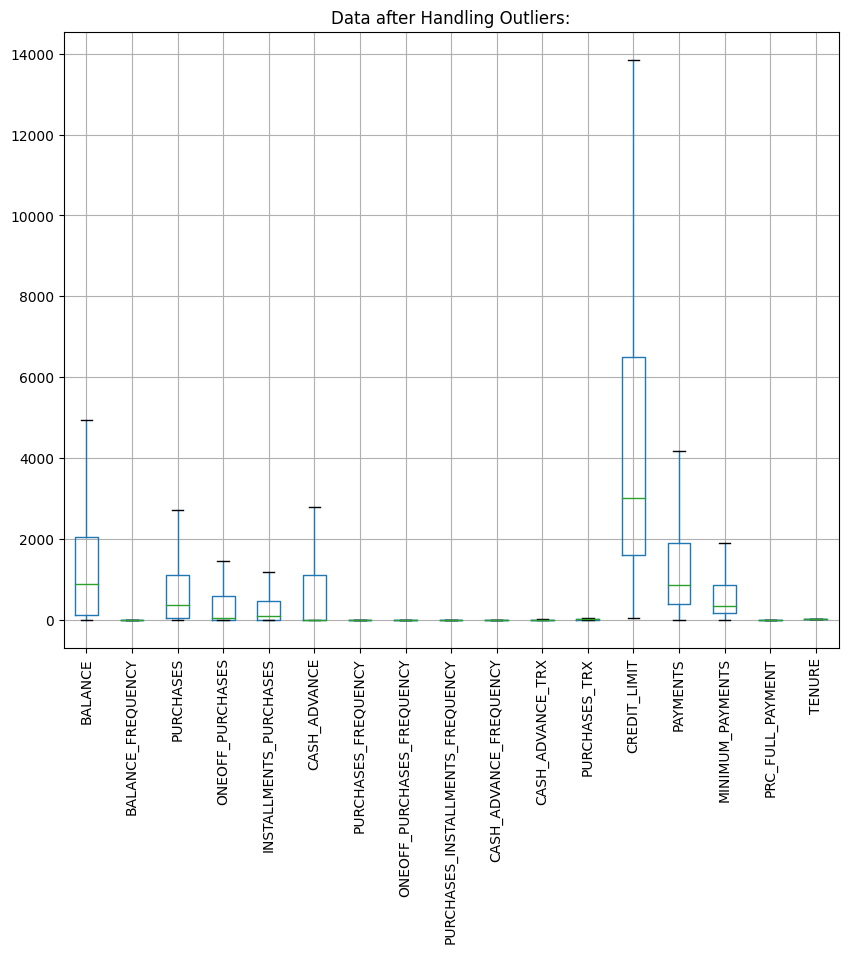

In [15]:
# print("Sample:", sample)
df_without_Outliers = Handling_Outliers(df)

print("Data after Handling Outliers:")
df_without_Outliers.boxplot(figsize=(10,8), rot=90.0)
plt.title("Data after Handling Outliers:")
plt.show()

In [16]:
print("Data Outliers from IQR method after Handling: ")
sample_outliers = detect_outliers_iqr(df_without_Outliers)
outliers = pd.Series(sample_outliers)
outliers.sort_values()

Data Outliers from IQR method after Handling: 


BALANCE                             0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
TENURE                              0
dtype: int64

In [17]:
df_without_Outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1390.508973,1537.538479,0.000000,128.281915,873.385231,2054.140036,4942.927215
BALANCE_FREQUENCY,8950.0,0.931587,0.110984,0.722223,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,737.149330,879.534788,0.000000,39.635000,361.280000,1110.130000,2715.872500
ONEOFF_PURCHASES,8950.0,354.358139,511.823289,0.000000,0.000000,38.000000,577.405000,1443.512500
INSTALLMENTS_PURCHASES,8950.0,295.546214,396.181546,0.000000,0.000000,89.000000,468.637500,1171.593750
CASH_ADVANCE,8950.0,672.468924,998.514970,0.000000,0.000000,0.000000,1113.821139,2784.552848
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.184773,0.255668,0.000000,0.000000,0.083333,0.300000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.126061,0.172676,0.000000,0.000000,0.000000,0.222222,0.555555


# Principal Components analysis

In [18]:
# drop the "CUST_ID" column
df.drop('CUST_ID', inplace=True, axis=1)

(8950, 17)
choosing the right number of dim =  12
(17, 17)


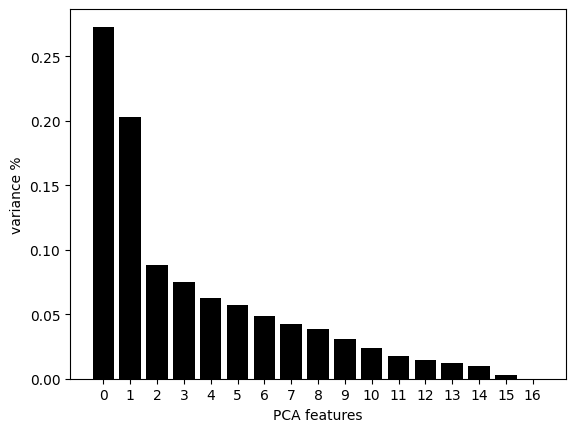

In [25]:
# Apply sklearn to Implement PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()
df_std = StandardScaler().fit_transform(df)

# print df_std shape 
print(df_std.shape)

principalComponents = pca.fit_transform(df_std)

# choosing the right number of dim
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= .95) + 1
print('choosing the right number of dim = ', d)

# show Wd that contains d principal components
print(pca.components_.shape)

# plot the explained variance ratio
feature = range(pca.n_components_)
plt.bar(feature, pca.explained_variance_ratio_, color='black')
plt.xticks(feature)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()


In [21]:
# save principalComponents to a DataFrame
PCA_df = pd.DataFrame(principalComponents)

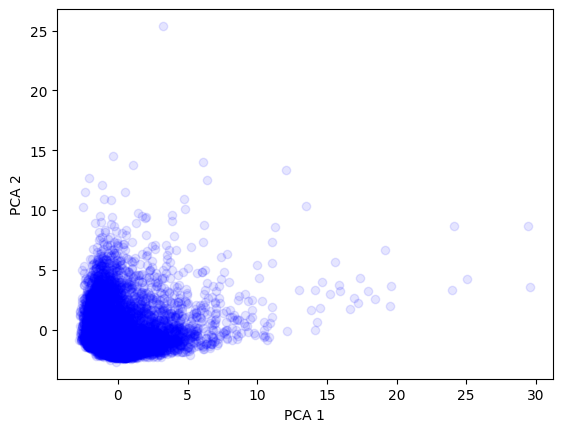

In [22]:
# plot the first 2 components
plt.scatter(PCA_df[0],PCA_df[1], alpha=.1, color='blue')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Find the Clusters

c:\Users\DELL\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

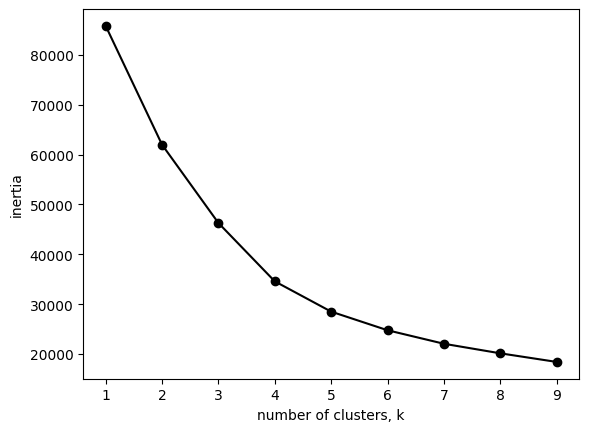

In [23]:
from sklearn.cluster import KMeans

# we will use k-means clustering to view the top three PCA components 
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

c:\Users\DELL\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


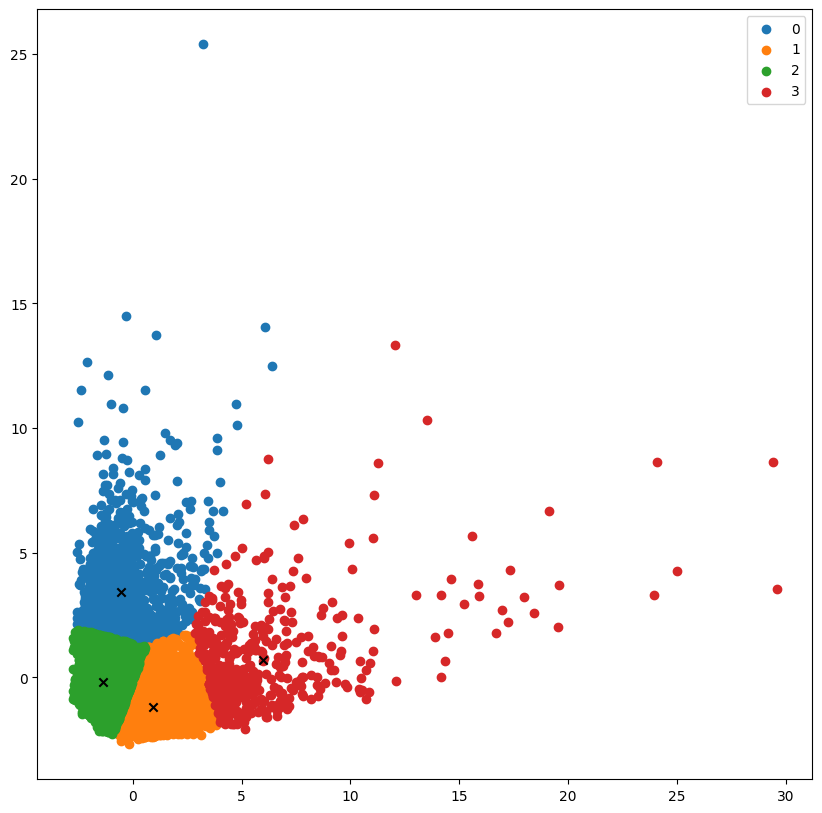

In [29]:
# create clustering algorithm

pca = PCA(n_components=2)
data = pca.fit_transform(df_std)

model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
centers = np.array(model.cluster_centers_)

plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

#This is done to find the centroid for each clusters.
plt.legend()
plt.show()